In [ ]:
# 0201.py
import cv2

imageFile = './data/lena.jpg'
img  = cv2.imread(imageFile)    # cv2.IMREAD_COLOR
img2 = cv2.imread(imageFile, 0) # cv2.IMREAD_GRAYSCALE
cv2.imshow('Lena color',img)
cv2.imshow('Lena grayscale',img2)

cv2.waitKey()
cv2.destroyAllWindows()



In [ ]:
# 0202.py
import cv2

imageFile = './data/lena.jpg'
img = cv2.imread(imageFile) # cv2.imread(imageFile, cv2.IMREAD_COLOR)
cv2.imwrite('./data/Lena.bmp', img)
cv2.imwrite('./data/Lena.png', img)
cv2.imwrite('./data/Lena2.png',img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
cv2.imwrite('./data/Lena2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])


In [ ]:
# 0203.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgBGR = cv2.imread(imageFile) # cv2.IMREAD_COLOR
plt.axis('off')
#plt.imshow(imgBGR)
#plt.show()

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()


In [ ]:
# 0204.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)
plt.axis('off')

plt.imshow(imgGray, cmap = "gray", interpolation='bicubic')
plt.show()


In [ ]:
# 0205.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(imgGray, cmap = 'gray')
##plt.axis('tight')
plt.axis('off')
plt.savefig('./data/0205.png')
plt.show()


In [ ]:
# 0206.py
import cv2
from   matplotlib import pyplot as plt

path = './data/'
imgBGR1 = cv2.imread(path+'lena.jpg')
imgBGR2 = cv2.imread(path+'apple.jpg')
imgBGR3 = cv2.imread(path+'baboon.jpg')
imgBGR4 = cv2.imread(path+'orange.jpg')

# 컬러 변환: BGR -> RGB
imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig.canvas.set_window_title('Sample Pictures')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis("off")
ax[1][0].imshow(imgRGB3, aspect = "auto")

ax[1][0].axis("off")
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                    wspace=0.05, hspace=0.05)
plt.savefig("./data/0206.png", bbox_inches='tight')
plt.show()


In [ ]:
# 0207.py
import cv2

##cap = cv2.VideoCapture(0)  # 0번 카메라
cap = cv2.VideoCapture('./data/vtest.avi')
##cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
##cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:   
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break

    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


In [ ]:
# 0208.py

In [ ]:
# 0209.py

In [ ]:
# 0210.py
import cv2

cap = cv2.VideoCapture(0) # 0번 카메라
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

#fourcc = cv2.VideoWriter_fourcc(*'DIVX')  # ('D', 'I', 'V', 'X')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out1 = cv2.VideoWriter('./data/record0.mp4',fourcc, 20.0, frame_size)
out2 = cv2.VideoWriter('./data/record1.mp4',fourcc, 20.0, frame_size,isColor=False)

while True:
    retval, frame = cap.read()
    if not retval:
        break   
    out1.write(frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out2.write(gray)        
    cv2.imshow('frame',frame)
    cv2.imshow('gray',gray)      
    
    key = cv2.waitKey(25)
    if key == 27:
        break
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()


In [ ]:
# 0211.py
import cv2
import matplotlib.pyplot as plt

#1
def handle_key_press(event):
    if event.key == 'escape':
        cap.release()
        plt.close()       
def handle_close(evt):
    print('Close figure!')
    cap.release()

#2 프로그램 시작    
cap = cv2.VideoCapture(0) # 0번 카메라

plt.ion() # 대화모드 설정
fig = plt.figure(figsize=(10, 6)) # fig.set_size_inches(10, 6)
plt.axis('off')
#ax = fig.gca()
#ax.set_axis_off()
fig.canvas.set_window_title('Video Capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('close_event', handle_close)

retval, frame = cap.read() # 첫 프레임 캡처 
im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#3
while True:
    retval, frame = cap.read() # 프레임 캡처  
    if not retval:
        break       
#    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    fig.canvas.draw()
#   fig.canvas.draw_idle()
    fig.canvas.flush_events()  # plt.pause(0.001)
if cap.isOpened():
    cap.release()


In [ ]:
# 0212.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 프로그램 시작    
cap = cv2.VideoCapture(0)
fig = plt.figure(figsize=(10, 6)) # fig.set_size_inches(10, 6)
fig.canvas.set_window_title('Video Capture')
plt.axis('off')

def init():
    global im
    retval, frame = cap.read() # 첫 프레임 캡처
    im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
##    return im,

def updateFrame(k): 
    retval, frame = cap.read()
    if retval:
        im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

ani = animation.FuncAnimation(fig, updateFrame, init_func=init, interval=50)
plt.show()
if cap.isOpened():
    cap.release()


In [ ]:
# 0213.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video:
    def __init__(self, device=0):
        self.cap = cv2.VideoCapture(device)
        self.retval, self.frame = self.cap.read()
        self.im = plt.imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
        print('start capture ...')
       
    def updateFrame(self, k):
        self.retval, self.frame = self.cap.read()
        self.im.set_array(cv2.cvtColor(camera.frame, cv2.COLOR_BGR2RGB))
#       return self.im,

    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')

# 프로그램 시작 
fig = plt.figure()
fig.canvas.set_window_title('Video Capture')
plt.axis("off")

camera = Video()
##camera = Video('./data/vtest.avi')
ani = animation.FuncAnimation(fig, camera.updateFrame, interval=50)
plt.show()
camera.close()


C:\Users\munin\AppData\Local\Temp\ipykernel_13148\3627635128.py:12: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title('Video Capture')


start capture ...


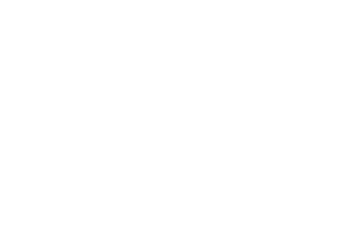

finish capture.


In [1]:
# 0214.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=50, repeat_delay=5, blit=False, **kwargs):

        if fig is None:
            self.fig = plt.figure()
            self.fig.canvas.set_window_title('Video Capture')
            plt.axis("off")
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                    frames=frames, interval=interval, blit=blit,
                                    repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print("start capture ...")
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im = plt.imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
                    
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im.set_array(cv2.cvtColor(camera.frame, cv2.COLOR_BGR2RGB))
#       return self.im,
       
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print("finish capture.")

# 프로그램 시작 
camera = Video()
##camera = Video('./data/vtest.avi')
plt.show()
camera.close()


C:\Users\munin\AppData\Local\Temp\ipykernel_13148\903010186.py:12: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title('Video Capture')


start capture ...


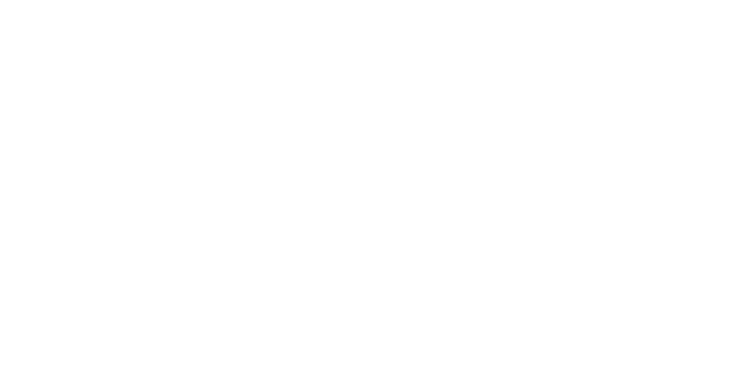

finish capture.


In [2]:
# 0215.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=80, repeat_delay=5, blit=False, **kwargs):
        if fig is None:
            self.fig, self.ax = plt.subplots(1, 2, figsize=(10,5))
            self.fig.canvas.set_window_title('Video Capture')
            self.ax[0].set_position([0, 0, 0.5, 1])
            self.ax[0].axis('off')

            self.ax[1].set_position([0.5, 0, 0.5, 1])
            self.ax[1].axis('off')
##            plt.subplots_adjust(left=0,bottom=0,right=1,top=1,
##                                wspace=0.05,hspace=0.05)
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                   frames=frames, interval=interval, blit=blit,
                                   repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print('start capture ...')
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im0 = self.ax[0].imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB),
                                      aspect = 'auto')
            self.im1 = self.ax[1].imshow(np.zeros(self.frame.shape, self.frame.dtype),
                                      aspect = 'auto')                    
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0.set_array(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))

            gray = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
            self.im1.set_array(cv2.merge((gray,gray,gray)))
            
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')


# 프로그램 시작 
camera = Video()
plt.show()
camera.close()
